#  Exploratory Data Analysis of Rainfall in India

## By Deepak Kaura (DK)

This project is about Rainfall in India , I will be making visualization on it, along with analysis 

* Remember : This EDA on the bases of 1901 to 2015 given dataset of Rainfall in India.

In this Notebook we Will be covering Following Topics :


1. Importing and Pre preprocessing Data

2. Exploratory Data Analysis Of Rainfall in India

3. Exploratory Data Analysis Of Districtwise Rainfall

4. Conclusion

# 1.  Importing and Preprocessing Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Rainfall Distribution Across India

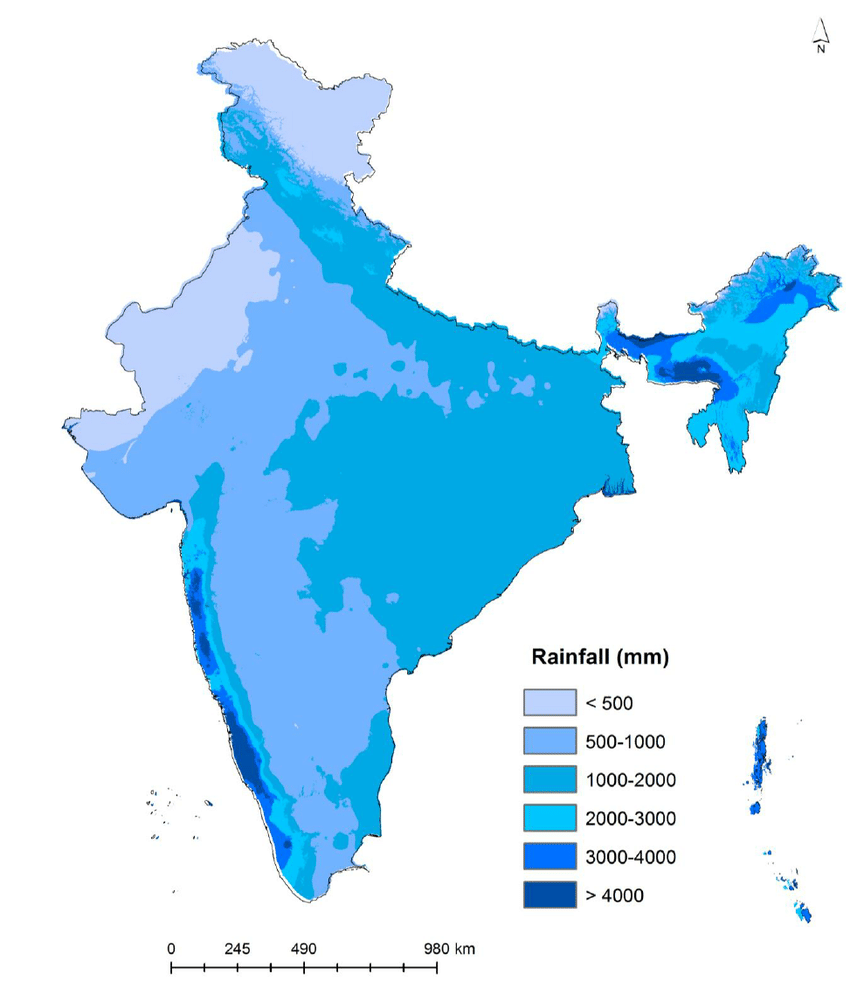

In [8]:
from IPython.display import Image
Image(filename='rainfall map.PNG')

From the above picture we can see that India receives heavy rainfall in coastal South West region and in the North East.The Shayadri and the Himalayan mountain ranges obstruct the clouds which cause heavy rainfall in these regions.East and Central India receive moderate annual rainfall.North West India which includes Thar desert receives scanty annual ranfall.

#### Importing the 115 years of Indian rainfall data

In [9]:
India = pd.read_csv("rainfall in india 1901-2015.csv",sep=",")

## Displaying the head of the data

In [10]:
India.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


We have 115 years of monthly,seasonal and annual rainfall data of India in the dataset

## Summary of Dataset

In [11]:
print('Rows     :',India.shape[0])
print('Columns  :',India.shape[1])
print('\nFeatures :\n     :',India.columns.tolist())
print('\nMissing values    :',India.isnull().values.sum())
print('\nUnique values :  \n',India.nunique())

Rows     : 4116
Columns  : 19

Features :
     : ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

Missing values    : 134

Unique values :  
 SUBDIVISION      36
YEAR            115
JAN             802
FEB             898
MAR             978
APR            1234
MAY            1731
JUN            2722
JUL            3050
AUG            2913
SEP            2632
OCT            1939
NOV            1239
DEC             801
ANNUAL         3712
Jan-Feb        1220
Mar-May        2262
Jun-Sep        3683
Oct-Dec        2389
dtype: int64


## Inspecting the Missing Values in Dataset

,Total,Percent
ANNUAL,26,0.006317
Oct-Dec,13,0.003158
NOV,11,0.002672
Jun-Sep,10,0.002430
DEC,10,0.002430


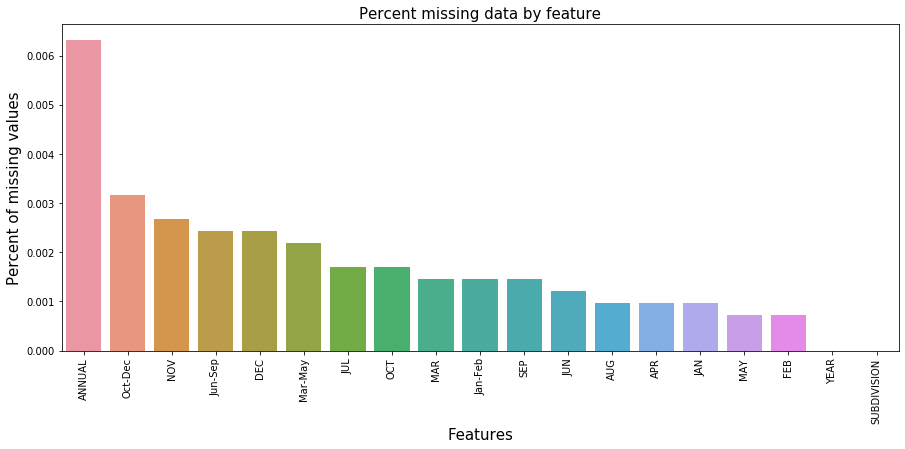

In [12]:
total = India.isnull().sum().sort_values(ascending=False)
percent = (India.isnull().sum()/India.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

We can clearly See that the Annual Rainfall column has maximum missing values.We have to divise a strategy to fill up this missing values





We can see that there are some missing values in the data set.

## Type of values in the data set

In [13]:
India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

## Replacing the missing values with mean of the column

In [14]:
India['JAN'].fillna((India['JAN'].mean()), inplace=True)
India['FEB'].fillna((India['FEB'].mean()), inplace=True)
India['MAR'].fillna((India['MAR'].mean()), inplace=True)
India['APR'].fillna((India['APR'].mean()), inplace=True)
India['MAY'].fillna((India['MAY'].mean()), inplace=True)
India['JUN'].fillna((India['JUN'].mean()), inplace=True)
India['JUL'].fillna((India['JUL'].mean()), inplace=True)
India['AUG'].fillna((India['AUG'].mean()), inplace=True)
India['SEP'].fillna((India['SEP'].mean()), inplace=True)
India['OCT'].fillna((India['OCT'].mean()), inplace=True)
India['NOV'].fillna((India['NOV'].mean()), inplace=True)
India['DEC'].fillna((India['DEC'].mean()), inplace=True)
India['ANNUAL'].fillna((India['ANNUAL'].mean()), inplace=True)
India['Jan-Feb'].fillna((India['Jan-Feb'].mean()), inplace=True)
India['Mar-May'].fillna((India['Mar-May'].mean()), inplace=True)
India['Jun-Sep'].fillna((India['Jun-Sep'].mean()), inplace=True)
India['Oct-Dec'].fillna((India['Oct-Dec'].mean()), inplace=True)

In [15]:
India.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,4116.0,1958.218659,33.140898,1901.0,1930.000,1958.00,1987.000,2015.0
JAN,4116.0,18.957320,33.569044,0.0,0.600,6.00,22.125,583.7
FEB,4116.0,21.805325,35.896396,0.0,0.600,6.70,26.800,403.5
MAR,4116.0,27.359197,46.925176,0.0,1.000,7.90,31.225,605.6
APR,4116.0,43.127432,67.798192,0.0,3.000,15.70,49.825,595.1
MAY,4116.0,85.745417,123.189974,0.0,8.600,36.70,96.825,1168.6
JUN,4116.0,230.234444,234.568120,0.4,70.475,138.90,304.950,1609.9
JUL,4116.0,347.214334,269.310313,0.0,175.900,284.90,418.225,2362.8
AUG,4116.0,290.263497,188.678707,0.0,156.150,259.50,377.725,1664.6
SEP,4116.0,197.361922,135.309591,0.1,100.600,174.10,265.725,1222.0


# 2.   Exploratory Data Analysis Of Indian Rainfall

## Annual rainfall in India

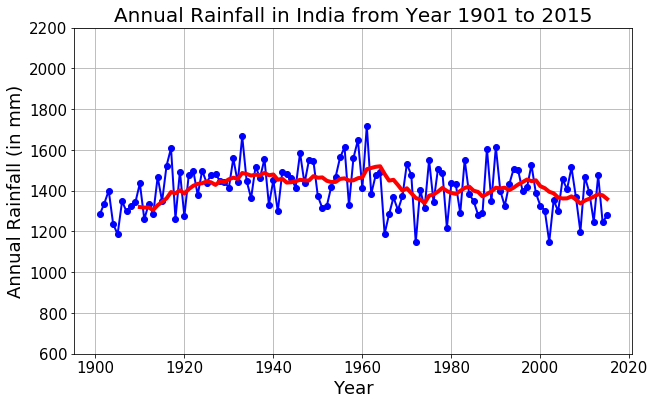

In [19]:
ax=India.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(600,2200),color='b',marker='o',linestyle='-',linewidth=2,figsize=(10,6));
India['MA10'] = India.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean()
India.MA10.plot(color='r',linewidth=4)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Annual Rainfall (in mm)',fontsize=18)
plt.title('Annual Rainfall in India from Year 1901 to 2015',fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

Highest average rainfall in India was recored in the year 1961.This was because in 1961 India received multiple cyclones.City of Pune was flooded in the year 1961 which is remembered as Panshet Flood.Due to heavy rains Panshet dam developed cracks and gave way.While the dam started cracking Indian army carried out emergency operation to stop flow of water.Sand bags were used to stop the flow of water.It gave people some time to evacuate before the dam was destroyed.Early morning water entered the city had caused massive damage.

Year 1965-66 were twin drought years and there was food scarcity in India.Prime Minister Lal Bahadur Shastri gave the Slogan Jai Jawan Jai Kissan to people of India.This lead to green revolution in India making India a food surplus country in the coming decades.

The red line is the 10 year moving average of the rainfall in India.It seems since 1960s there is slight dip in the rainfall in India.Now a days due to global warming the period of Monsoon season has shortned.We see more of erratic rainfall pattern.This needs more study.

## Seasonal rainfall in India

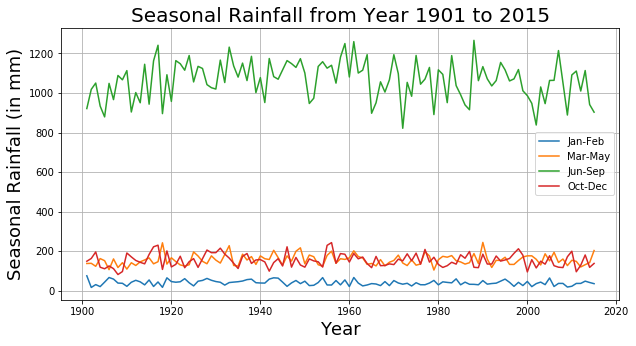

In [20]:
India[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").mean().plot(figsize=(10,5));
plt.xlabel('Year',fontsize=18)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=18)
plt.title('Seasonal Rainfall from Year 1901 to 2015',fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

Plotting a seasonal rainfall we can see that highest rainfall is received between Jun-Sep which is the monsoon season in India.Oct-Dec is the season of return monsoon and cyclone season in the Bay of Bengal.A major city like Chennai only receives the return monsoon.Jan-Feb receives very less rainfall as this is the winter season across the sub-continent.Mar-May is the time for summer rains which is generally acompanied by thunder storms.

## Season wise rainfall in India

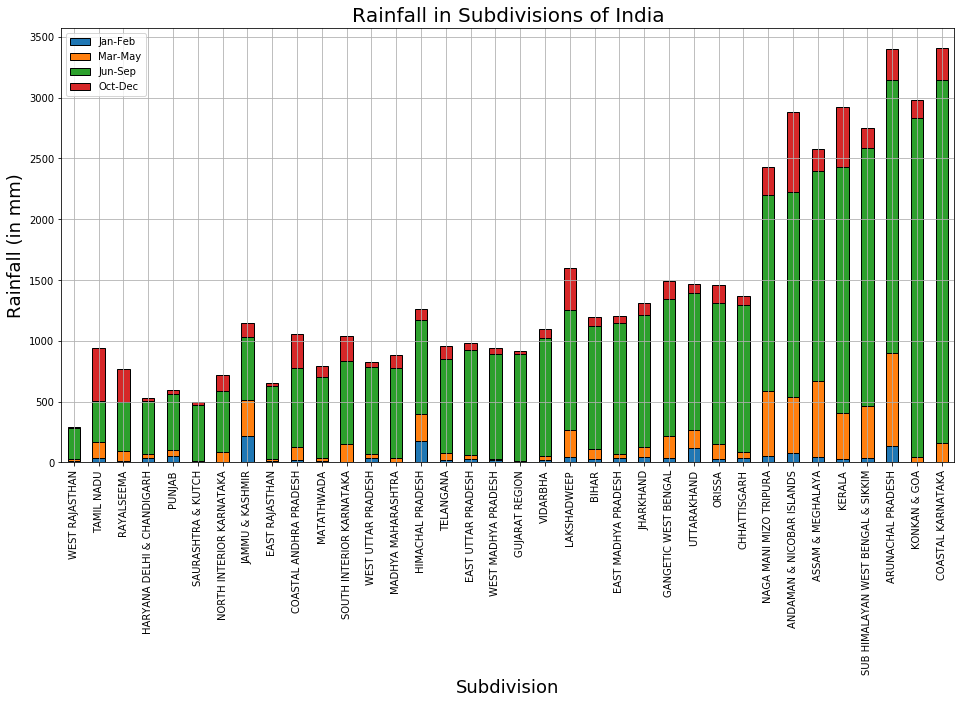

In [22]:
India[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('Subdivision',fontsize=18)
plt.ylabel('Rainfall (in mm)',fontsize=18)
plt.title('Rainfall in Subdivisions of India',fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

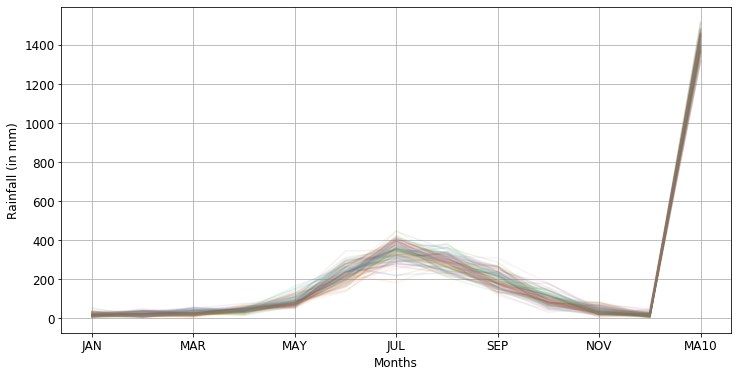

In [23]:
drop_col = ['ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']

fig, ax = plt.subplots()

(India.groupby(by='YEAR')
 .mean()
 .drop(drop_col, axis=1)
 .T
 .plot(alpha=0.1, figsize=(12, 6), legend=False, fontsize=12, ax=ax)
)
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Rainfall (in mm)', fontsize=12)
plt.grid()
plt.ioff()

 A) From the above graph we can see that majority of rainfall is received in the month of Jun-Sep which is the Monsoon             season.
 
   *    Oct-Dec is time of return monsoon.
   *    Jan-Feb are the winter months.
   *    Mar-May is time for Summer rains.


 B) Coastal Karnataka,Arunachal Pradesh,Konkan Goa and Kerala receive highest rainfall.


 C) Rajastan,Gujrat,Haryana and Punjab receives low rainfall.  Interesting thing is that Punjab and Haryana have high                 agricultural output despite low rainfall.  Their water requirnments are met by rivers and canals.

## Box Plot of Annual Rainfall

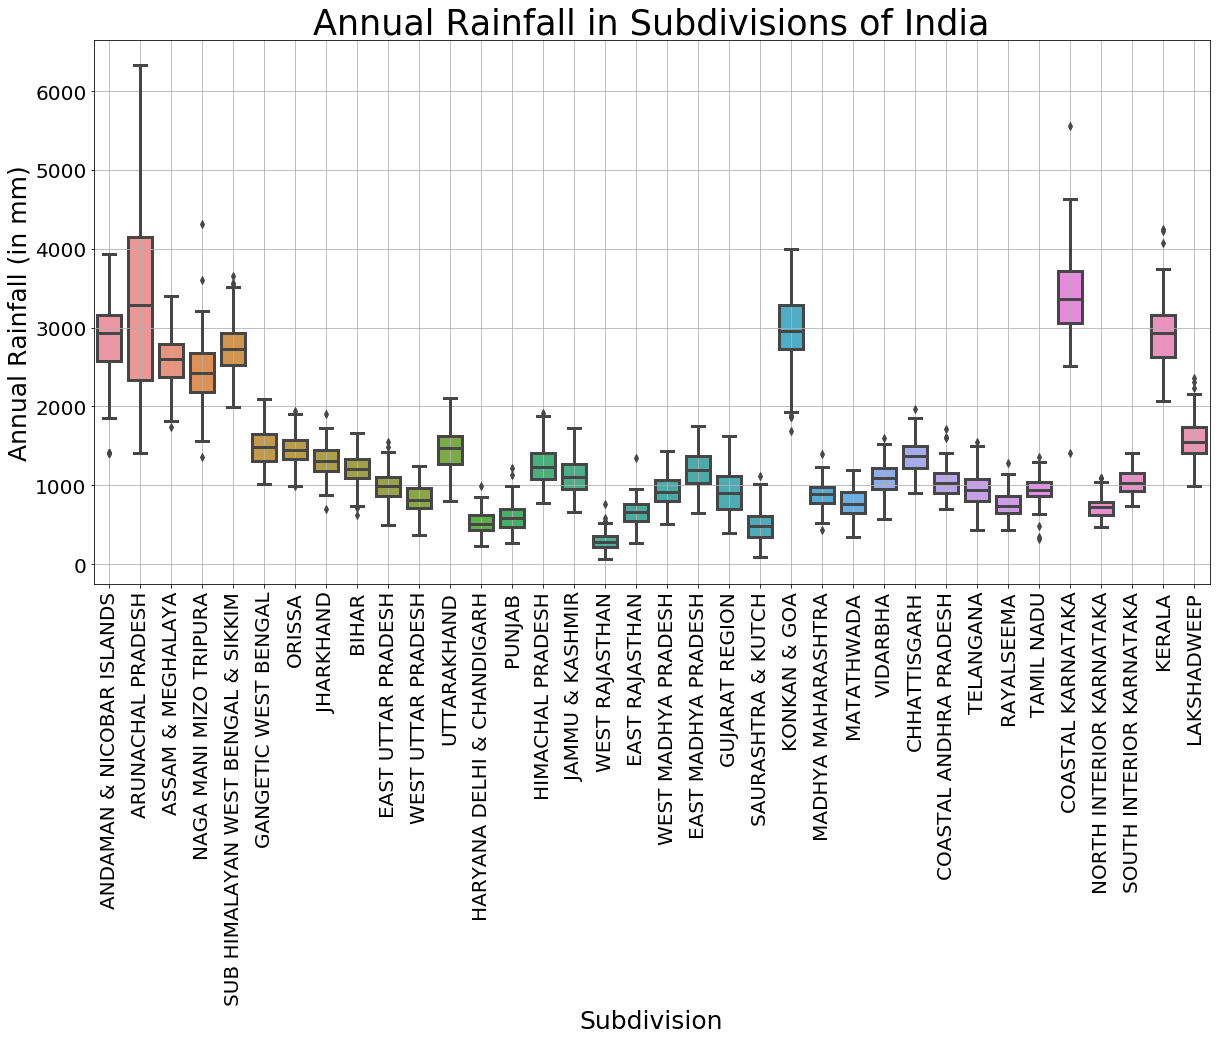

In [24]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=India,width=0.8,linewidth=3)
ax.set_xlabel('Subdivision',fontsize=25)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=25)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=35)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

We can see Subdivision Arunachal Pradesh shows highest highest difference between Maximum and Minimum rainfall received.Costal Karnataka receives close to 3400 mm of Annual rainfall which is the highest in India.West Rajastan receives the least amount of rainfall.

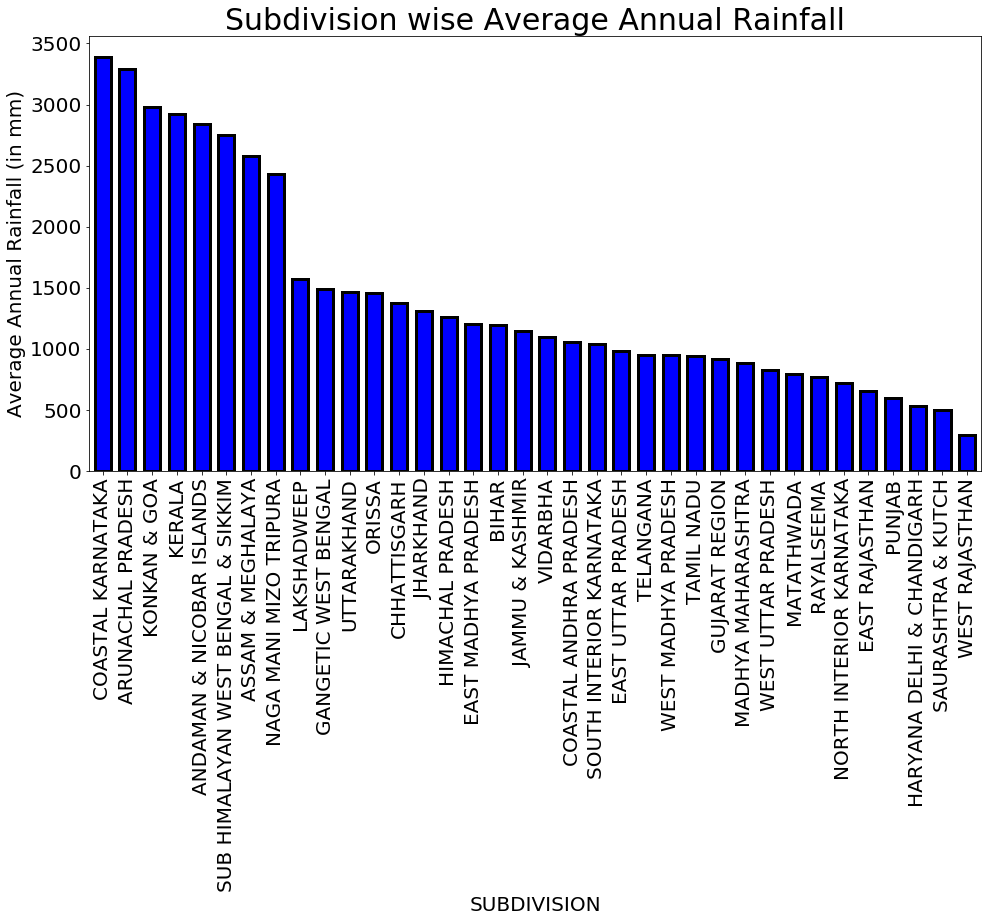

In [34]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
India.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='b',width=0.65,linewidth=3,edgecolor='k',align='center',title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (in mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


## Monthwise Rainfall in India

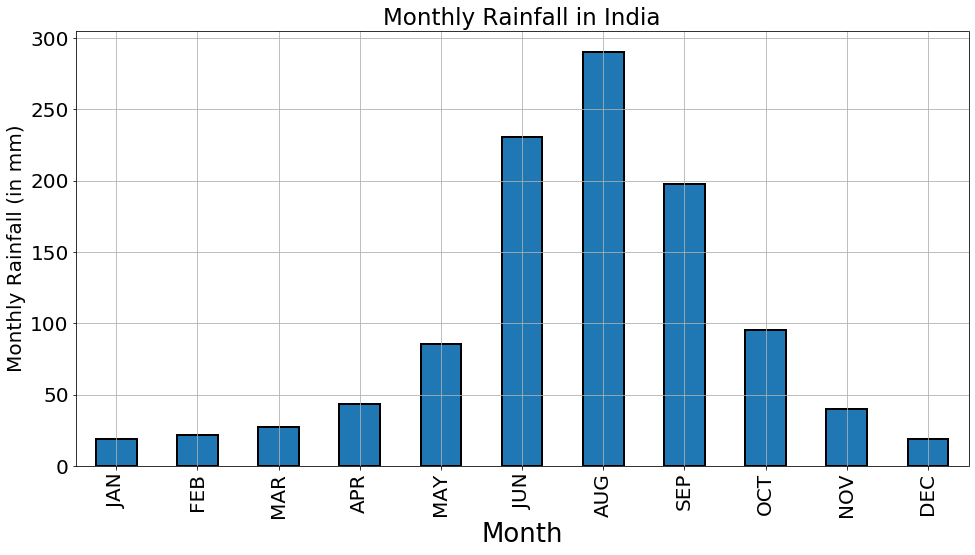

In [35]:
ax=India[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(16,8))
plt.xlabel('Month',fontsize=26)
plt.ylabel('Monthly Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall in India',fontsize=23)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

In [37]:
India[['JAN','FEB','MAR','APR','MAY','JUN','AUG','SEP','OCT','NOV','DEC']].mean()

JAN     18.957320
FEB     21.805325
MAR     27.359197
APR     43.127432
MAY     85.745417
JUN    230.234444
AUG    290.263497
SEP    197.361922
OCT     95.507009
NOV     39.866163
DEC     18.870580
dtype: float64

From above we can see that August (290mm) is the month with peak of Monsoon Season and June (230mm) followed up. 

# Heat Map of Rainfall

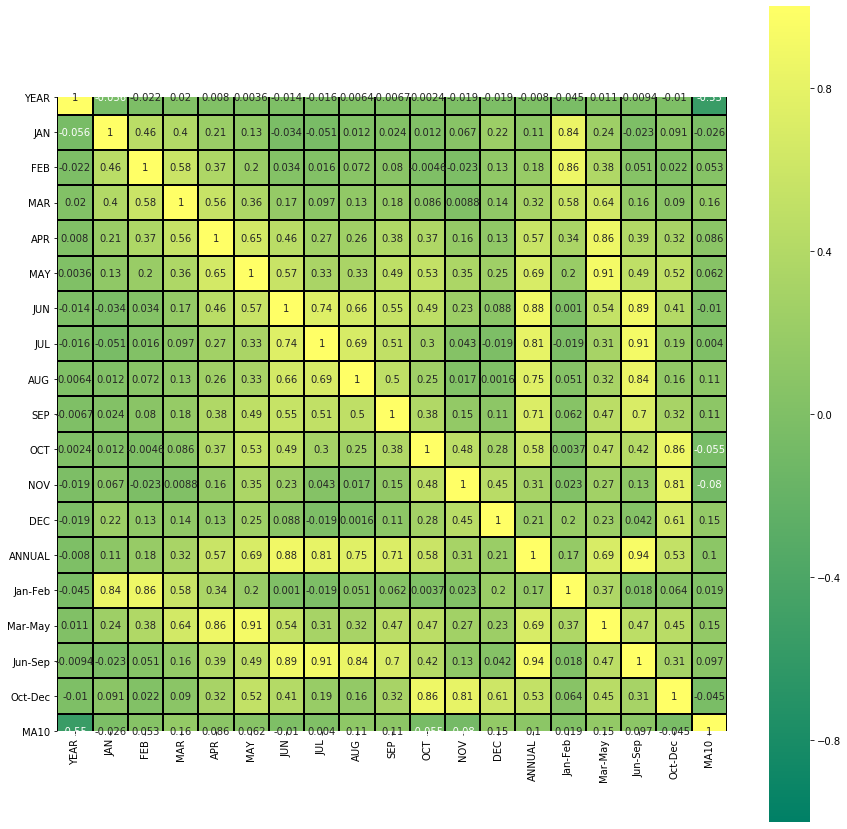

In [38]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(India.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

We can see that Annual rainfall has very high correlation to the rainfall received in the months of Jun-Sep

# 3.  Exploratory Data Analysis Of Districtwise Rainfall Data

## Importing the Districtwise rainfall data

In [40]:
Dist = pd.read_csv("district wise rainfall normal.csv",sep=",")


Dist.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


## Annual rainfall in different districts of Kerala

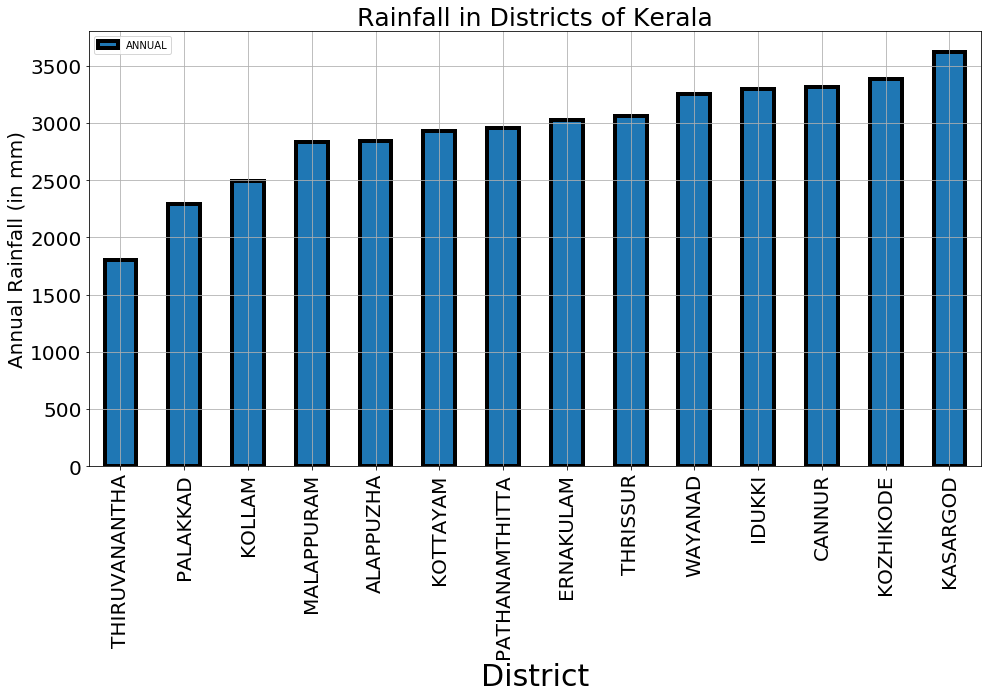

In [52]:
KDist=Dist[Dist.STATE_UT_NAME == 'KERALA']
k=KDist.sort_values(by=['ANNUAL'])
ax=k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Districts of Kerala',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

From the graph we can see that Kasargod which is Northern most district of Kerala receives highest annual rainfall.Trivandrum which is the southern most district receives the least amount of rainfall.From this we can clearly make out that rainfall increases as we more from South to North in the State of Kerala.This could be due to proximity of Shayadri mountain ranges in the Northern disctrict of Kerala.

## Five districts with maximum rainfall in India

In [53]:
Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().head(5)

DISTRICT
LADAKH (LEH)      94.6
JAISALMER        181.2
KARGIL           223.3
SRI GANGANAGA    252.9
BARMER           268.6
Name: ANNUAL, dtype: float64

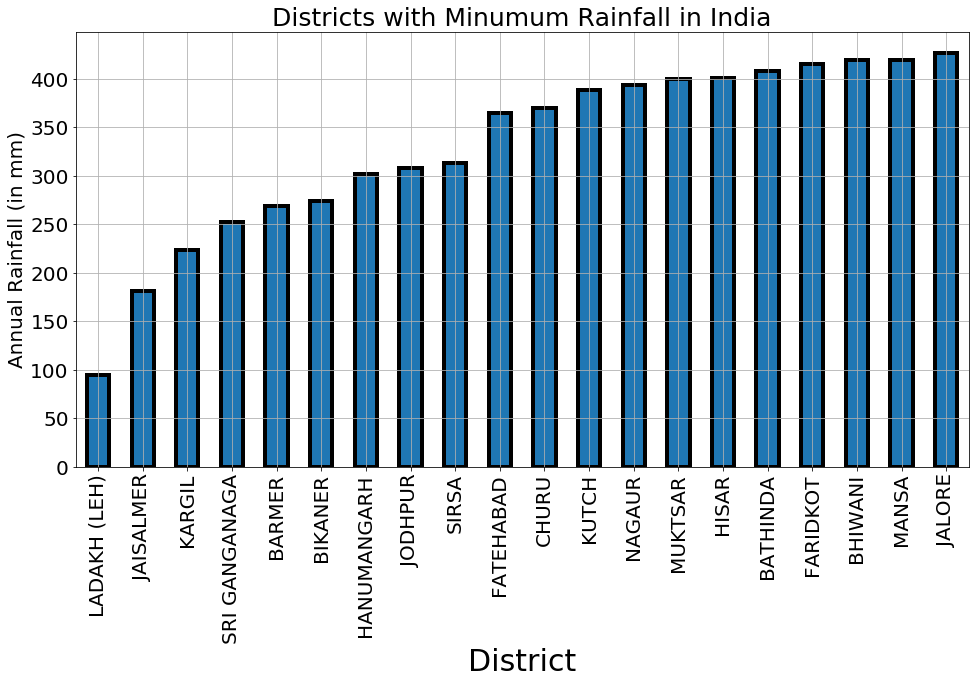

In [54]:
ax=Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
#ax=k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Minumum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

Ladak which is part of Jammu and Kashmir receives 94.6 mm. Ladak and Kargil which receive less rainfall are part of Indian State Jammu and Kashmir.Jaisalmer,Sri Ganganaga and Barmer are part of Rajastan State.

In [55]:
Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().tail(5)

DISTRICT
UDUPI            4306.0
UPPER SIANG      4402.1
EAST KHASI HI    6166.1
JAINTIA HILLS    6379.9
TAMENGLONG       7229.3
Name: ANNUAL, dtype: float64

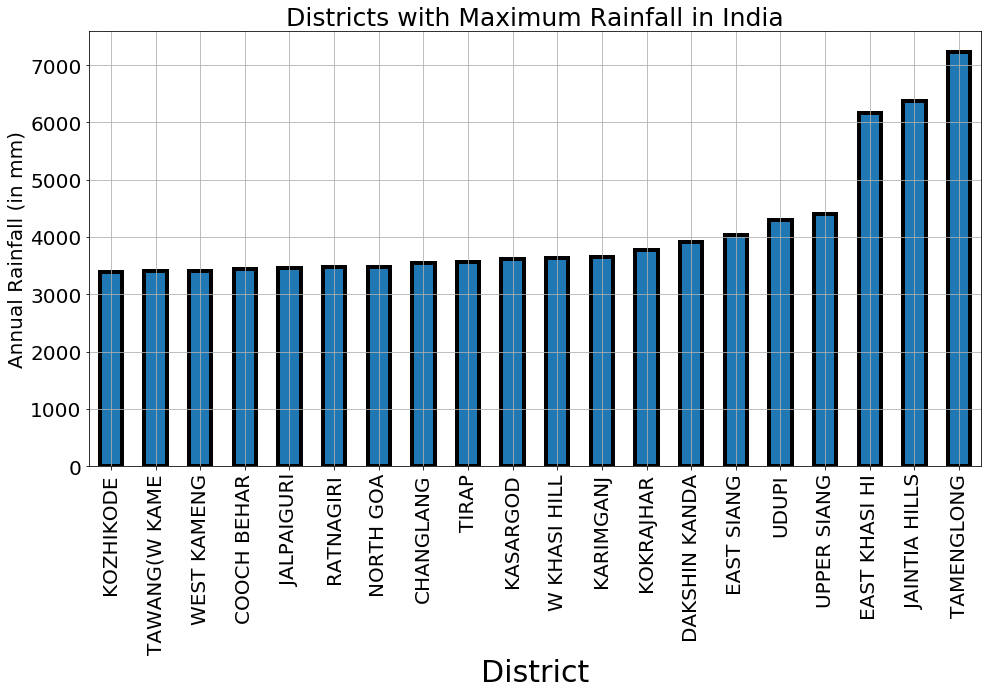

In [56]:
ax=Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().tail(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
#ax=k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Maximum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

Udupi which is part of Coastal Karnatka receives 4306 mm of Annual rainfall.Upper Siang is part of Arunachal Pradesh.East Kashi hill,Jaintha hills is part of Meghalaya.Tamenglong is part if Manipur.So Districts in Coastal Karnataka and North Eastern states receive heavy rainfall.

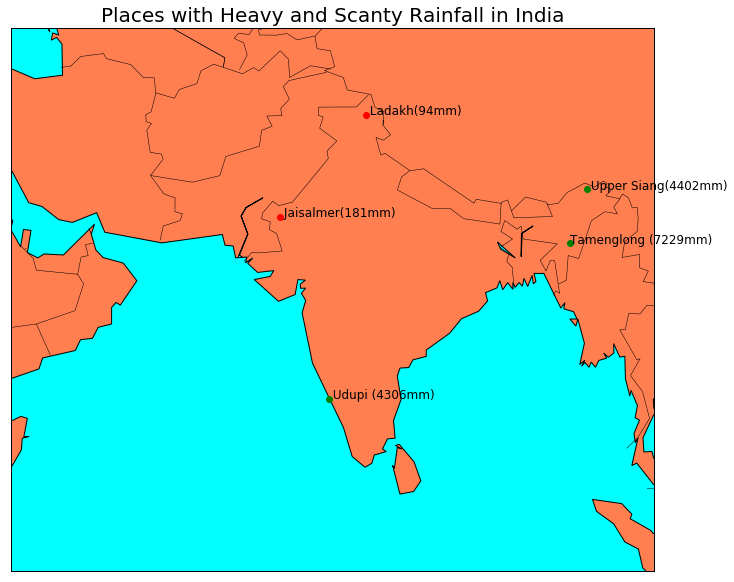

In [76]:
from IPython.display import Image
Image(filename='map.PNG')

##### Green Dots are areas of heavy rainfall and Red Dots are places of scanty rainfall.

## Which Years Had Highest Rainfall in India ?

In [77]:
India.groupby("YEAR").mean()['ANNUAL'].sort_values(ascending=False).head(10)

YEAR
1961    1717.100000
1933    1666.750000
1959    1648.230556
1990    1614.294444
1956    1612.840000
1917    1608.628272
1988    1605.469444
1946    1585.419692
1955    1563.554286
1958    1560.669444
Name: ANNUAL, dtype: float64

## Which Years Had Low Rainfall in India?

In [78]:
India.groupby("YEAR").mean()['ANNUAL'].sort_values(ascending=False).tail(10)

YEAR
1911    1259.911429
2012    1248.208581
2014    1244.336111
1904    1236.771429
1979    1217.508333
2009    1198.822469
1965    1188.783333
1905    1186.177143
2002    1148.830556
1972    1146.488889
Name: ANNUAL, dtype: float64

# 4.  Conclusion


*  We have looked at the rainfall data across India.From the plot we can say India receives heavy rainfall in coastal South West region and in the North East.The Shayadri and the Himalayan mountain ranges obstruct the clouds which cause heavy rainfall in these regions.East and Central India receive moderate annual rainfall.North West India which includes Thar desert receives scanty annual rainfall.


*  Highest Rainfall was observed in the year 1961.There were twin drough years in 1965-66.Highest rainfall is received between Jun-Sep which is the monsoon season in India.Oct-Dec is the season of return monsoon and cyclone season in the Bay of Bengal.


*  Coastal Karnataka,Arunachal Pradesh,Konkan Goa and Kerala receive highest rainfall.Rajastan,Gujrat,Haryana and Punjab receives low rainfall.Interesting thing is that Punjab and Haryana have high agricultural output despite low rainfall.Their water requirnments are met by rivers and canals.


*  We can see Subdivision Arunachal Pradesh shows highest highest difference between Maximum and Minimum rainfall received.Costal Karnataka receives close to 3400 mm of Annual rainfall which is the highest in India.West Rajastan receives the least amount of rainfall.


*  Kasargod which is Northern most district of Kerala receives highest annual rainfall.Trivandrum which is the southern most district receives the least amount of rainfall.From this we can clearly make out that rainfall increases as we more from South to North in the State of Kerala.This could be due to proximity of Shayadri mountain ranges in the Northern disctrict of Kerala.



*  Ladak which is part of Jammu and Kashmir receives 94.6 mm. Ladak and Kargil which receive less rainfall are part of Indian State Jammu and Kashmir.Jaisalmer,Sri Ganganaga and Barmer are part of Rajastan State.



*  Udupi which is part of Coastal Karnatka receives 4306 mm of Annual rainfall.Upper Siang is part of Arunachal Pradesh.East Kashi hill,Jaintha hills is part of Meghalaya.Tamenglong is part if Manipur.So Districts in Coastal Karnataka and North Eastern states receive heavy rainfall.